In [1]:
#!pip install Keras
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, Bidirectional
from keras import models 
import keras
from scipy.signal import blackman
from ast import literal_eval
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time

In [2]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [3]:
!pip install import-ipynb
import import_ipynb

In [4]:
from create_model import CreateModel

importing Jupyter notebook from create_model.ipynb


# Vector representation of v2 

# Bidirectional model

# Word vectors input

## Dataset

In [5]:
url = 'data/'
url_image='image_data/'

In [6]:
# Reading a csv file named df_node_kmeans_algorithms
df_data = pd.read_csv(url+'df_node_kmeans_algorithms.csv',converters={'tf-idf': eval,'tf-idf_after_norm':eval}) 
# Remove columns that do not need them for this model
df_data=df_data.drop(['wordvec','kmeans_clusters'], axis=1)
df_data.shape

(514, 5)

In [7]:
df_data.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  word_rank  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...        283   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        300   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...        331   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...        460   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        426   

   sum_cosine_similarity  
0             109.704459  
1             107.480757  
2             104.355574  
3              90.295322  
4              94.068587

In [8]:
# Create object of class CreateModel
model_obj=CreateModel()

In [9]:
# Get 10 words with the highest text rank
word_list=model_obj.words_highest_text_rank(df_data)

In [10]:
word_list

['tel_aviv',
 'design',
 'works',
 'develop',
 'product',
 'engineer',
 'technologies',
 'skills',
 'look',
 'team',
 'company']

In [11]:
# Enter the normal tf-idf values into the dataset
dataset = pd.DataFrame(df_data['tf-idf_after_norm'].to_list()).iloc[:,:].values
dataset.shape

(514, 699)

In [12]:
# Choose a number of time steps
n_steps = 50
# Call to function flat_split_sequences_validation
X_train, y_train, X_test, y_test, X_valid, y_valid = model_obj.flat_split_sequences_validation(dataset, n_steps)

In [13]:
y_train_lenght, y_valid_lenght, y_test_lenght= model_obj.get_lenght(X_train, X_valid, y_test)

y_train lenght : 389 , y_valid lenght : 129 , y_test lenght : 131


In [14]:
# Convert into input/output- Call to function reshape_data
X_train, y_train, X_test, y_test, X_valid, y_valid=model_obj.reshape_data(X_train, y_train, X_test, y_test, X_valid, y_valid, n_steps)
n_features = X_train.shape[2]
n_features

1

In [15]:
# Get predictive input data
full_X_train, full_y_train, full_X_test, full_y_test, full_X_valid, full_y_valid=model_obj.get_data_predict( df_data, n_steps)

# log-cosh

In [76]:
name_model='model_words_v2/LogCosh_Bidirectional_words_model_v2'
name_history='history_words_v2/LogCosh_Bidirectional_model_words_history_v2'

In [77]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.LogCosh())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [78]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


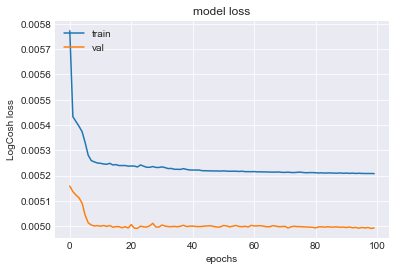

In [79]:
model_obj.model_loss(load_history,'LogCosh')

In [20]:
# Get a test and valid prediction for a logcosh loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [21]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 12s 5ms/step - loss: 0.0053


0.0053071752190589905

In [22]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  word_rank  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...        283   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        300   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...        331   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...        460   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        426   

   sum_cosine_similarity                                validate_prediction  \
0             109.704459  [[0.09692656], [0.04827246], [0.05102119], [0....   
1             107.480757  [[0.04271929], [0.041793264], [0.044279173], [...   
2             104.355574  [[0.046599075], [0.046298753], [0.046033744], ...   
3              90.295322  [[0.04177723], [0.04170727], [0.040809076], [0...   
4              94.068587  [[0.04237263], [0.041753862], [0.04118034], [0...   

                                     test_prediction  
0  [[0.043638397], [0.043330282], [0.04306772], [...  
1  [[0.19253005], [0.06999359], [0.16771515], [0....  
2  [[0.048240595], [0.048129097], [0.047970396], ...  
3  [[0.037913896], [0.22926365], [0.032609105], [...  
4  [[0.04626163], [0.04590507], [0.045792095], [0...

### Visualization of words prediction - LogCosh loss

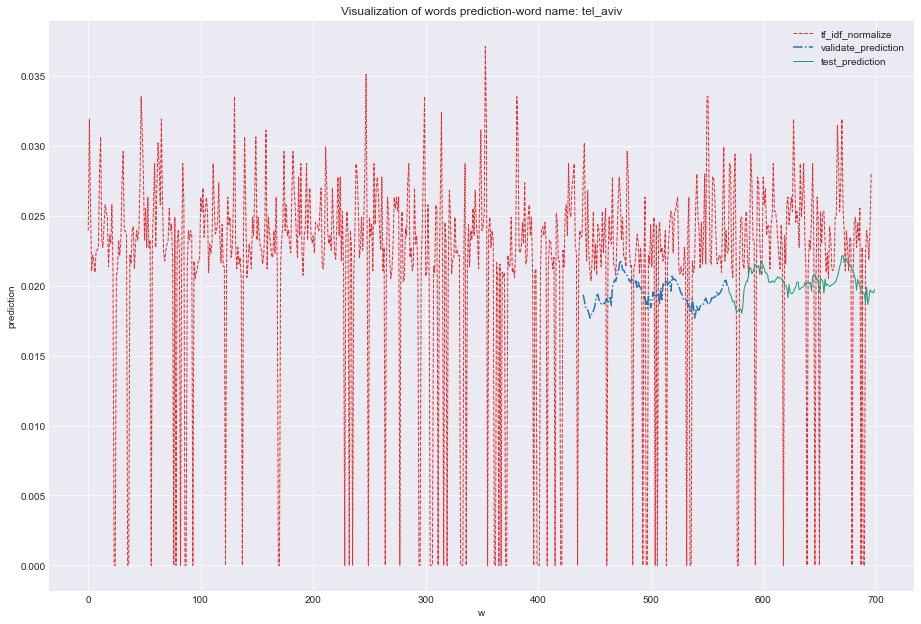

In [23]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

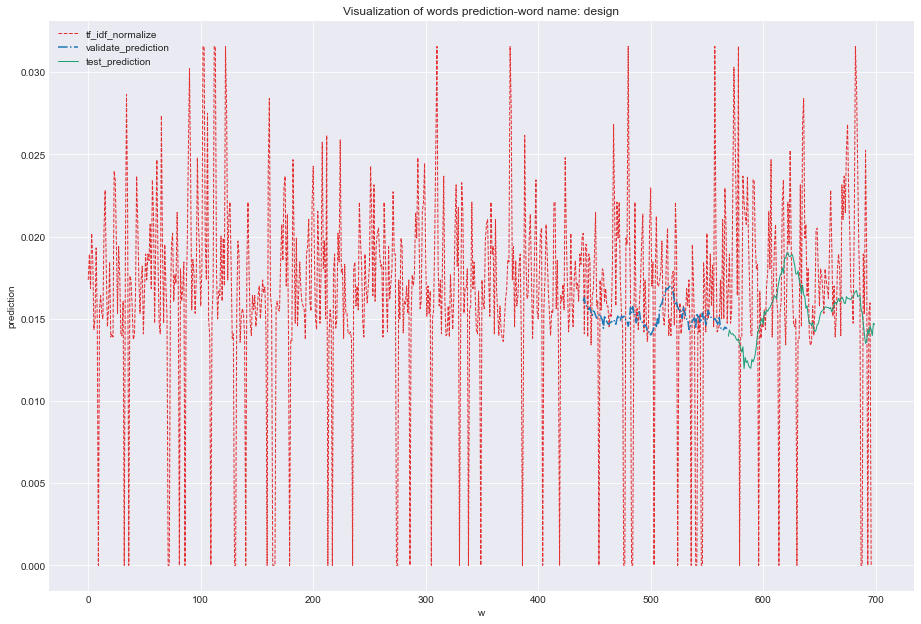

In [24]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

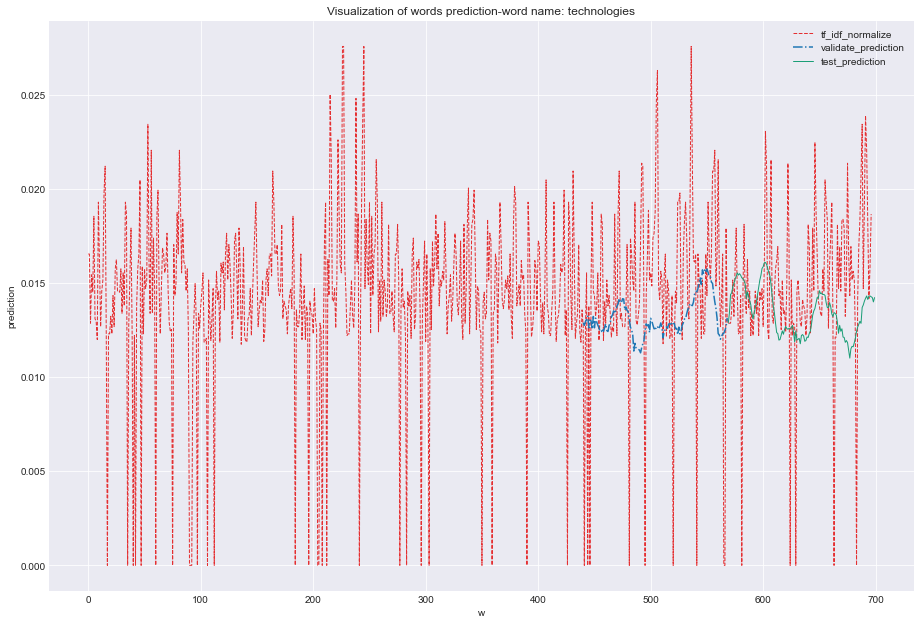

In [25]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

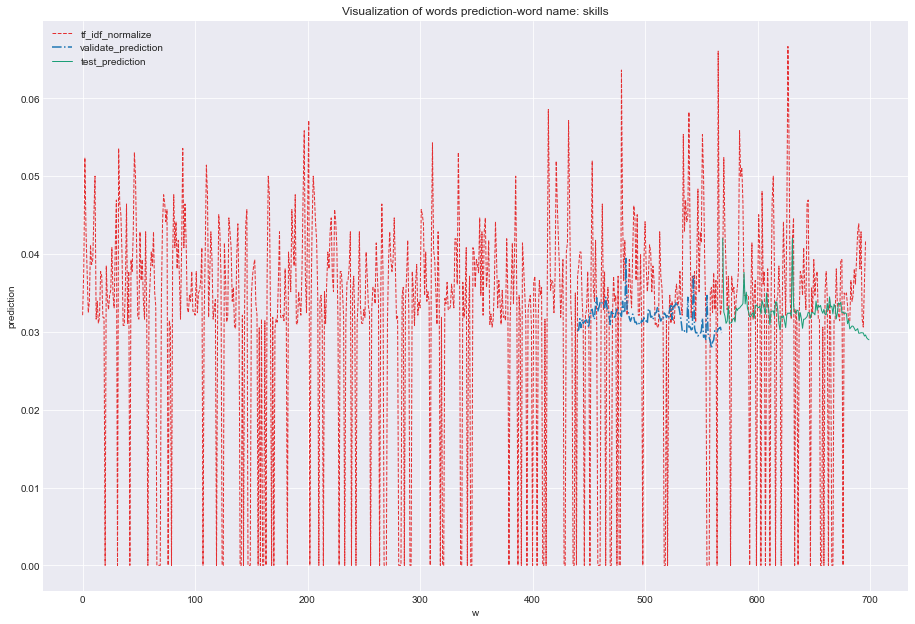

In [26]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

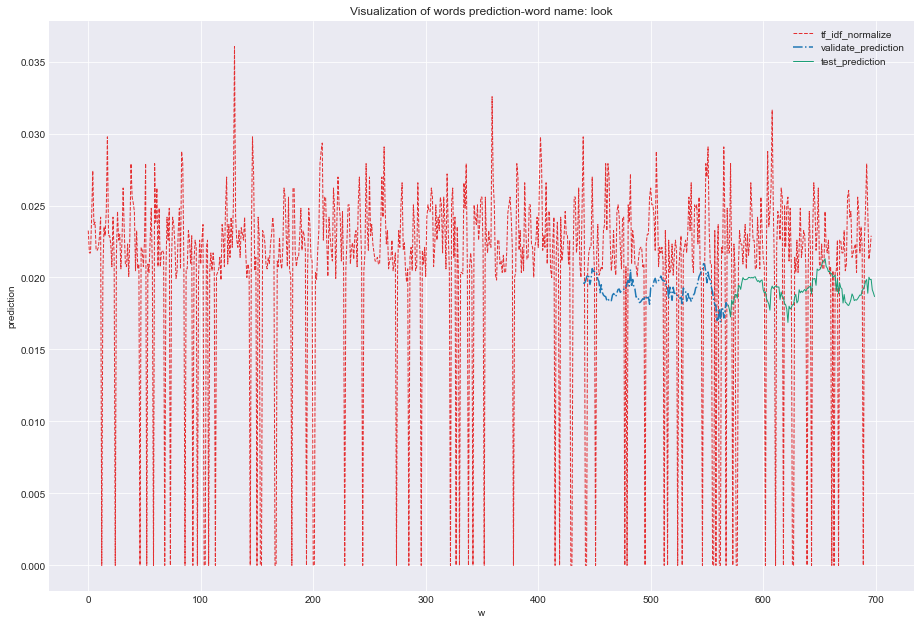

In [27]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

# Huber

In [28]:
name_model='model_words_v2/Huber_Bidirectional_words_model_v2'
name_history='history_words_v2/Huber_Bidirectional_model_words_history_v2'

In [29]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps,tf.keras.losses.Huber())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [30]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


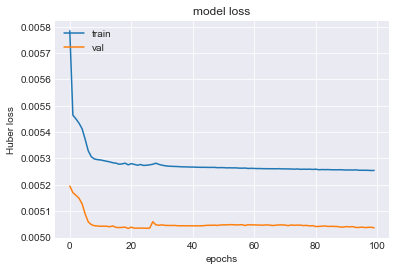

In [31]:
model_obj.model_loss(load_history,'Huber')

In [32]:
# Get a test and valid prediction for a Huber loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [33]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 12s 6ms/step - loss: 0.0054


0.005354353226721287

In [34]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  word_rank  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...        283   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        300   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...        331   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...        460   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        426   

   sum_cosine_similarity                                validate_prediction  \
0             109.704459  [[0.10009642], [0.052133694], [0.05426291], [0...   
1             107.480757  [[0.04741348], [0.041504692], [0.04398653], [0...   
2             104.355574  [[0.047282398], [0.047318242], [0.047379926], ...   
3              90.295322  [[0.04079268], [0.040484168], [0.040109448], [...   
4              94.068587  [[0.042723943], [0.04243356], [0.042179186], [...   

                                     test_prediction  
0  [[0.04479526], [0.044574082], [0.044359755], [...  
1  [[0.19204547], [0.07510407], [0.16468608], [0....  
2  [[0.04780432], [0.047813885], [0.047763817], [...  
3  [[0.039120827], [0.22612062], [0.030914087], [...  
4  [[0.04549305], [0.045684036], [0.045770235], [...

### Visualization of words prediction - Huber loss

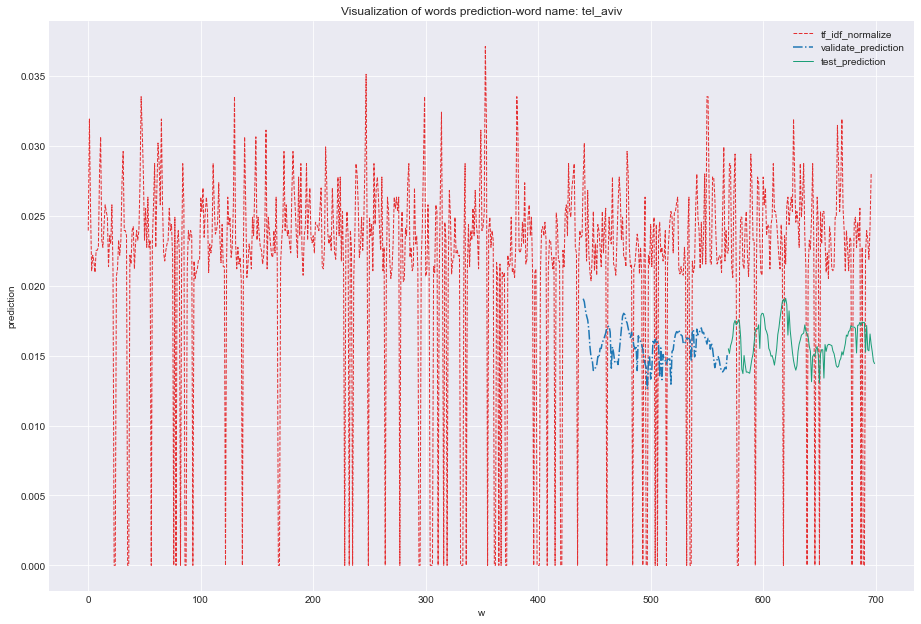

In [35]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

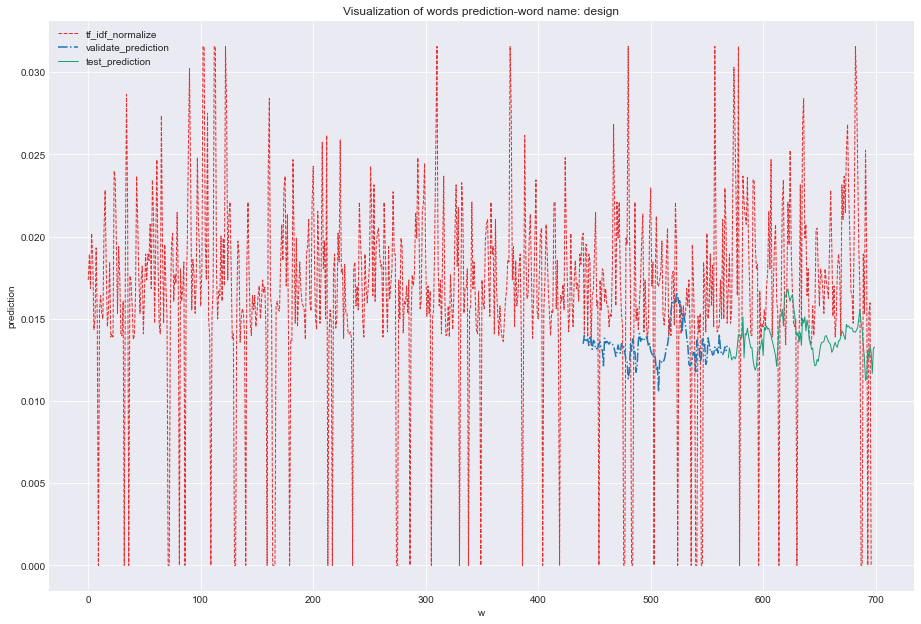

In [36]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

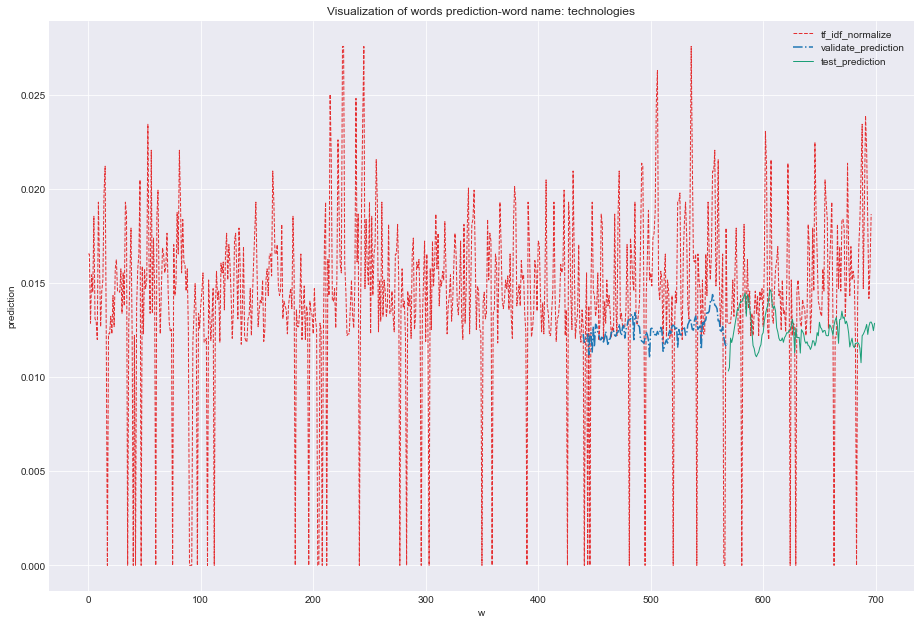

In [37]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

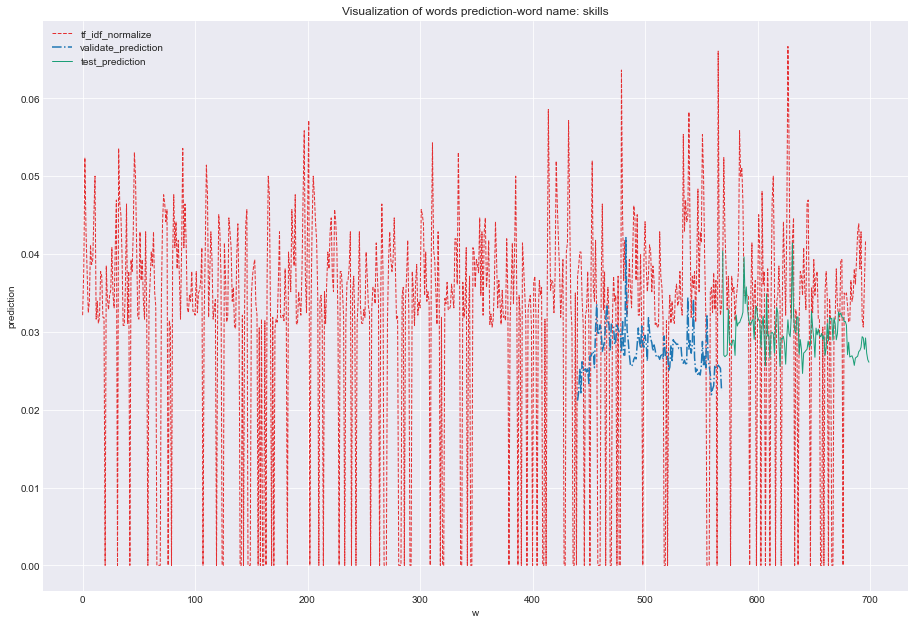

In [38]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

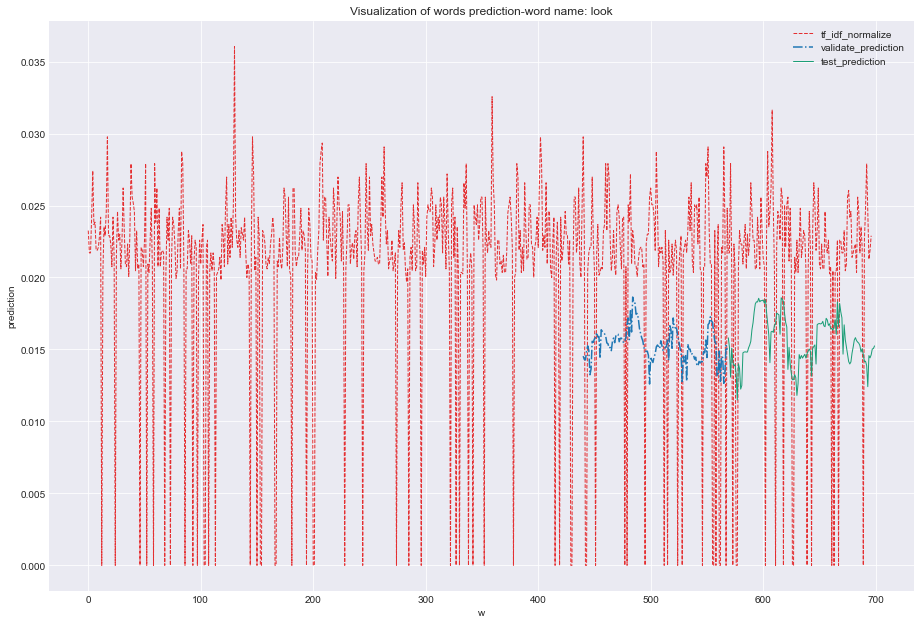

In [39]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## Logarithmic

In [40]:
name_model='model_words_v2/Logarithmic_Bidirectional_words_model_v2'
name_history='history_words_v2/Logarithmic_Bidirectional_model_words_history_v2'

In [41]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.MeanSquaredLogarithmicError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [42]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


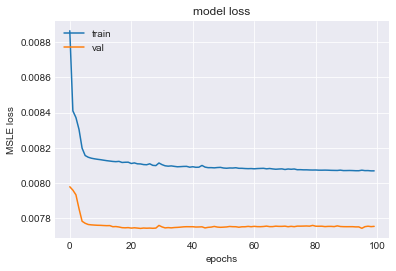

In [43]:
model_obj.model_loss(load_history,'MSLE')

In [44]:
# Get a test and valid prediction for a MSLE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [45]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 13s 6ms/step - loss: 0.0082


0.008216708898544312

In [46]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction

word                                             tf-idf  \
0              modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1                saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2                used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3               among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4            enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
..                ...                                                ...   
509       opportunity  [0.0008567574892199524, 0.002682795916704874, ...   
510             range  [0.0, 0.0017386453094614825, 0.001530572138552...   
511            israel  [0.0009481320701431865, 0.0009896401561632798,...   
512  web_applications  [0.0, 0.0017801731991694838, 0.001567130159106...   
513               day  [0.0016657219962611114, 0.0, 0.0, 0.0, 0.0, 0....   

                                     tf-idf_after_norm  word_rank  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...        283   
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        300   
2    [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...        331   
3    [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...        460   
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        426   
..                                                 ...        ...   
509  [0.18111853322109794, 0.2550444651480767, 0.0,...        111   
510  [0.0, 0.3665064312344805, 0.33955742893782753,...        407   
511  [0.20043511962826963, 0.2086161449192194, 0.19...        150   
512  [0.0, 0.3752605103849272, 0.3476678257978002, ...        414   
513  [0.35213363000959896, 0.0, 0.0, 0.0, 0.0, 0.0,...        402   

     sum_cosine_similarity                                validate_prediction  \
0               109.704459  [[0.09170988], [0.044122465], [0.047315158], [...   
1               107.480757  [[0.041158173], [0.043096032], [0.042391926], ...   
2               104.355574  [[0.043494586], [0.043409813], [0.043363422], ...   
3                90.295322  [[0.036116183], [0.03624033], [0.036110666], [...   
4                94.068587  [[0.038726915], [0.03837758], [0.03808476], [0...   
..                     ...                                                ...   
509             143.134680  [[0.053263407], [0.12347085], [0.07162351], [0...   
510              96.309947  [[0.04122349], [0.0412257], [0.041133925], [0....   
511             132.849933  [[0.049450517], [0.048711844], [0.117680915], ...   
512              95.732594  [[0.0871097], [0.035225533], [0.041406352], [0...   
513              96.705757  [[0.03911838], [0.038771506], [0.038011678], [...   

                                       test_prediction  
0    [[0.040442996], [0.04043258], [0.04047749], [0...  
1    [[0.18519247], [0.061063968], [0.16192314], [0...  
2    [[0.04350386], [0.043463167], [0.043390065], [...  
3    [[0.03540334], [0.21807288], [0.03071936], [0....  
4    [[0.04150959], [0.04137108], [0.041189626], [0...  
..                                                 ...  
509  [[0.04977758], [0.04970973], [0.12648259], [0....  
510  [[0.047920972], [0.042337406], [0.041401472], ...  
511  [[0.054277502], [0.0509364], [0.04898496], [0....  
512  [[0.038397912], [0.0375284], [0.0373624], [0.0...  
513  [[0.02588007], [0.05322881], [0.044370845], [0...  

[514 rows x 7 columns]

### Visualization of words prediction - MSLE loss

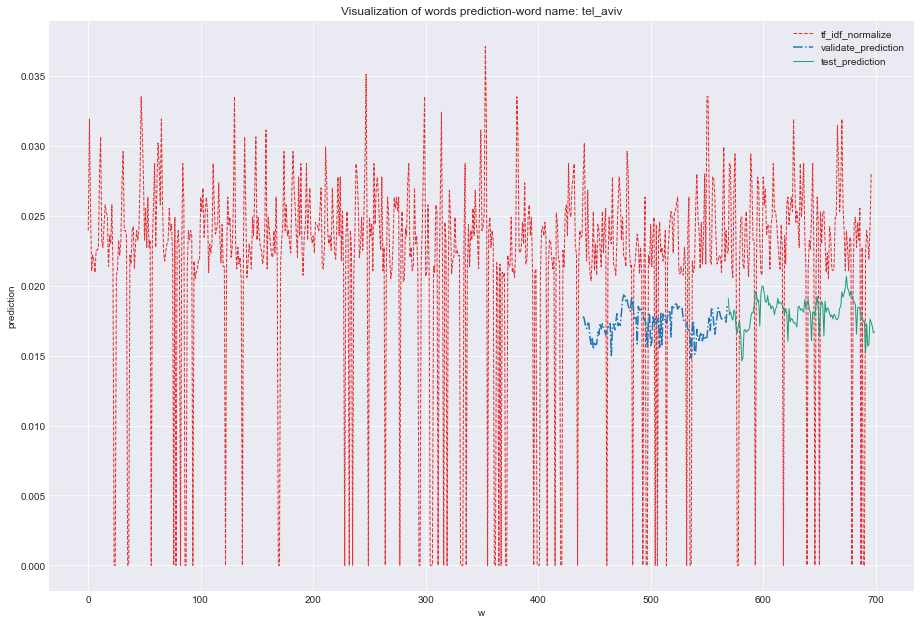

In [47]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

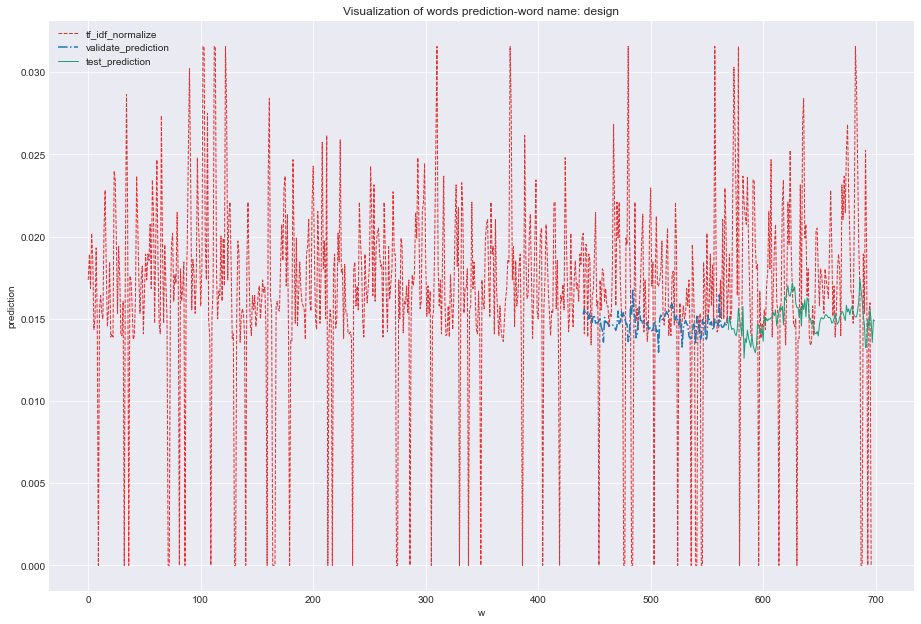

In [48]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

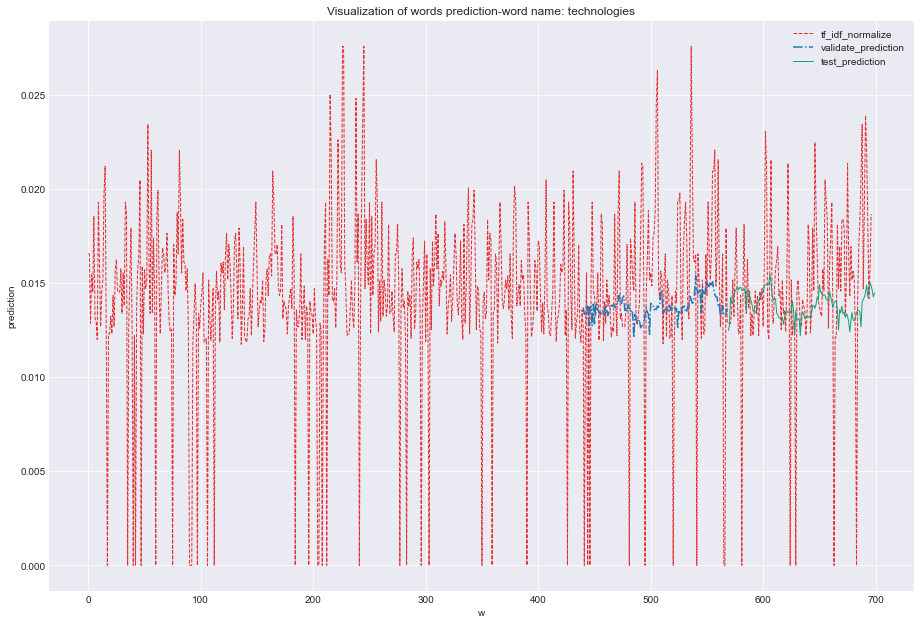

In [49]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

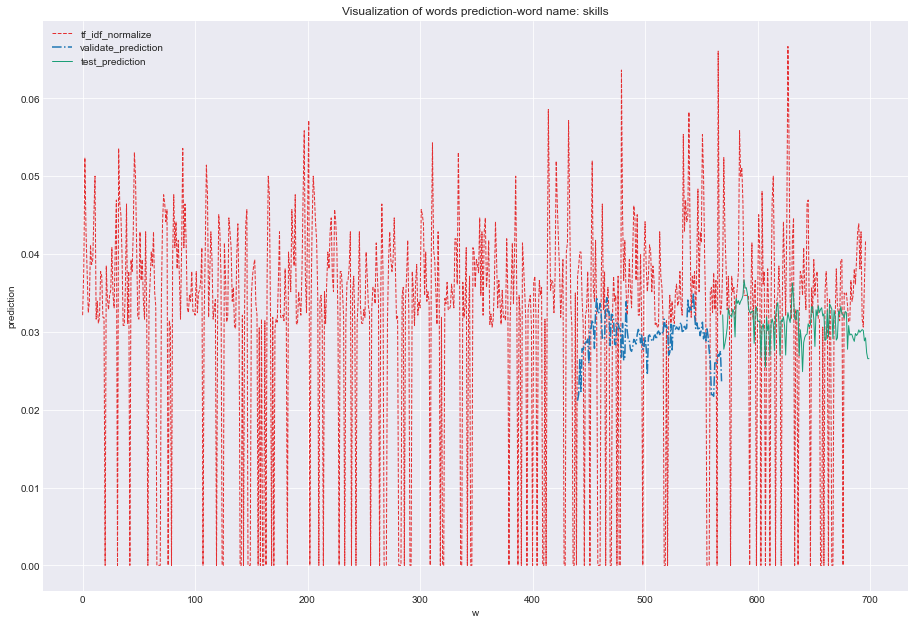

In [50]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

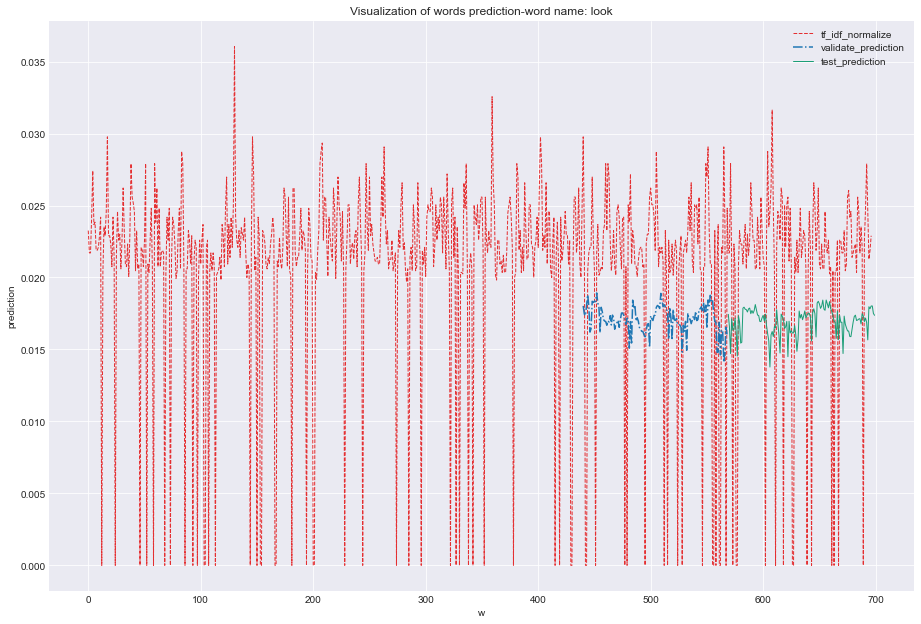

In [51]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MAE

In [52]:
name_model='model_words_v2/MAE_Bidirectional_words_model_v2'
name_history='history_words_v2/MAE_Bidirectional_model_words_history_v2'

In [53]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.MeanAbsoluteError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [54]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


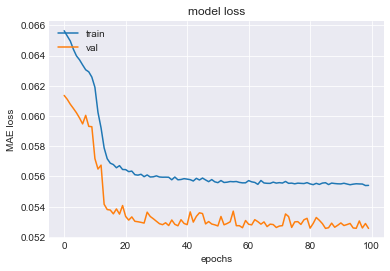

In [55]:
model_obj.model_loss(load_history,'MAE')

In [56]:
# Get a test and valid prediction for a MAE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [57]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 13s 6ms/step - loss: 0.0563


0.05629987642168999

In [58]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  word_rank  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...        283   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        300   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...        331   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...        460   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        426   

   sum_cosine_similarity                                validate_prediction  \
0             109.704459  [[0.005130369], [0.0025393032], [0.0007157065]...   
1             107.480757  [[0.0008367002], [-6.1582774e-05], [5.7753175e...   
2             104.355574  [[4.388392e-05], [7.490069e-05], [9.8954886e-0...   
3              90.295322  [[9.081885e-05], [5.2772462e-05], [7.361919e-0...   
4              94.068587  [[4.7676265e-05], [7.2166324e-05], [9.000301e-...   

                                     test_prediction  
0  [[0.00012261793], [0.00012884289], [0.00013053...  
1  [[0.29640102], [0.0015699305], [0.043323606], ...  
2  [[9.809807e-05], [8.6426735e-06], [-3.7562102e...  
3  [[8.615106e-05], [0.3425256], [0.00011416525],...  
4  [[7.380545e-05], [0.0001164265], [3.5829842e-0...

### Visualization of words prediction - MAE loss

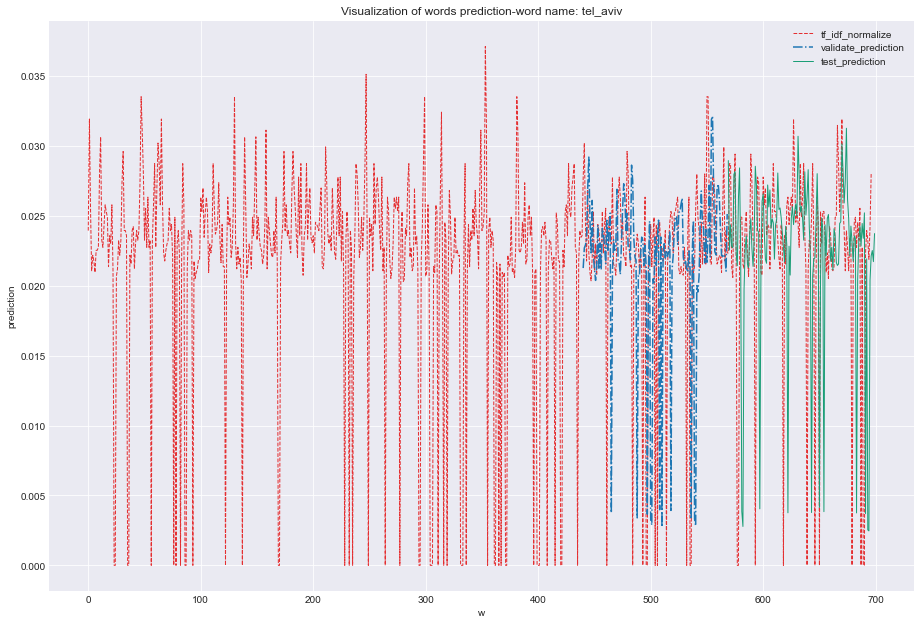

In [59]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

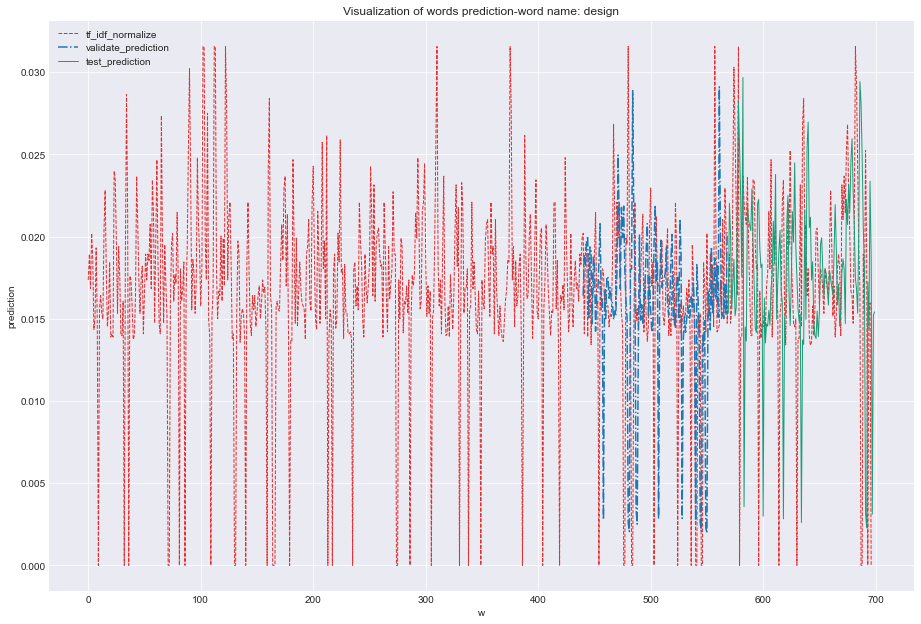

In [60]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

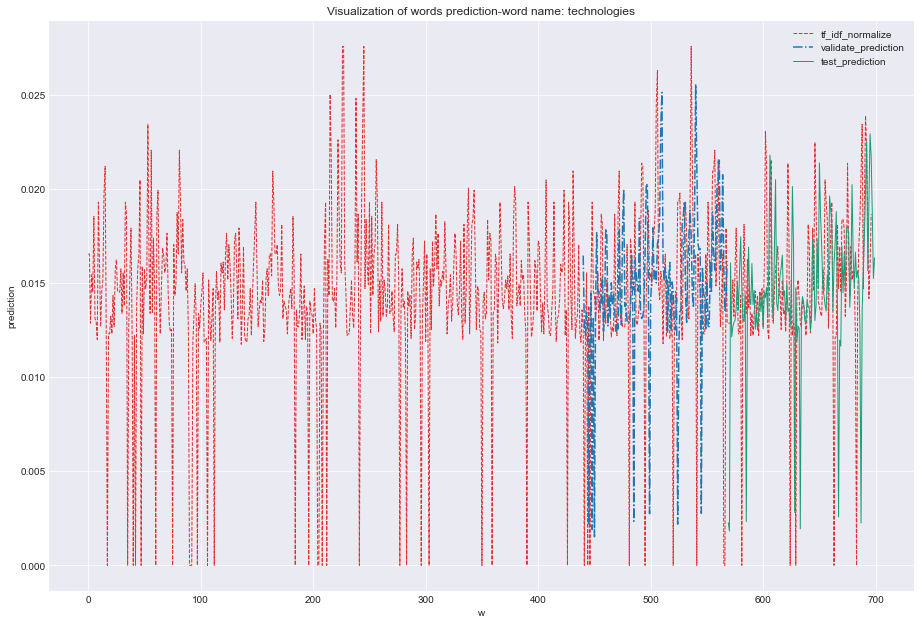

In [61]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

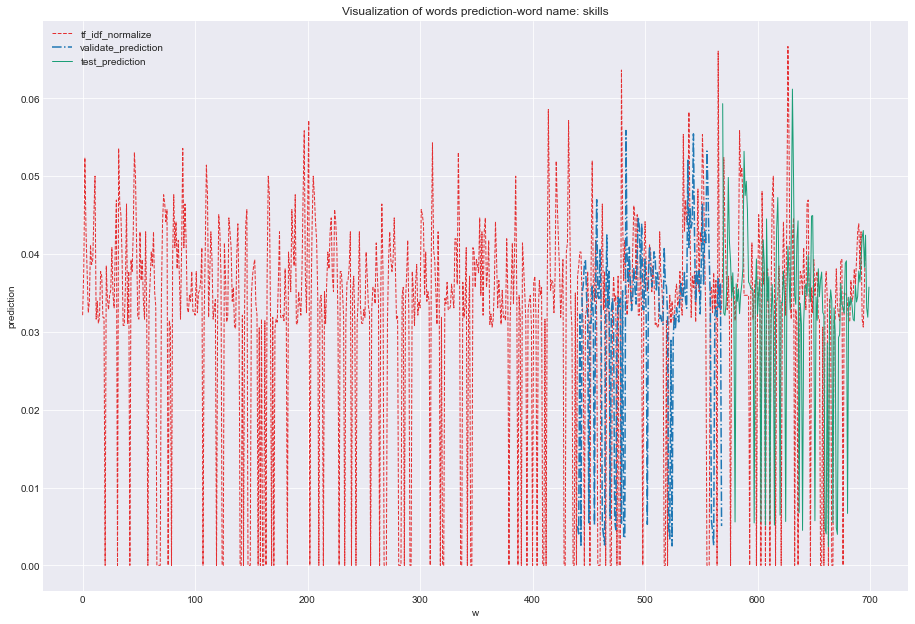

In [62]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

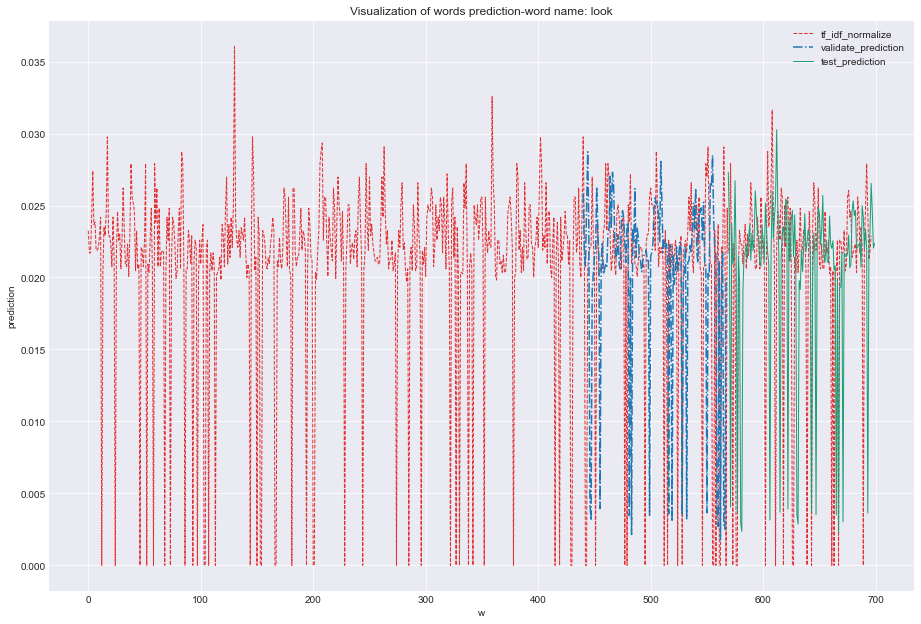

In [63]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MSE

In [64]:
name_model='model_words_v2/MSE_Bidirectional_words_model_v2'
name_history='history_words_v2/MSE_Bidirectional_model_words_history_v2'

In [65]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.MeanSquaredError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [66]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


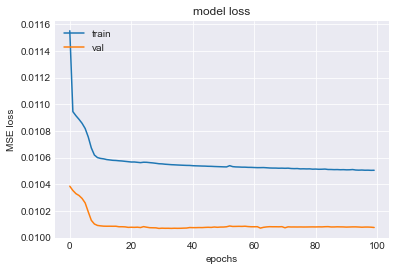

In [67]:
model_obj.model_loss(load_history,'MSE')

In [68]:
# Get a test and valid prediction for a MSE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [69]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 13s 6ms/step - loss: 0.0107


0.010703876614570618

In [70]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  word_rank  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...        283   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        300   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...        331   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...        460   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        426   

   sum_cosine_similarity                                validate_prediction  \
0             109.704459  [[0.0957587], [0.045181356], [0.04995779], [0....   
1             107.480757  [[0.04194694], [0.042096756], [0.045266345], [...   
2             104.355574  [[0.047488995], [0.04724177], [0.04699707], [0...   
3              90.295322  [[0.045708254], [0.045842104], [0.045310073], ...   
4              94.068587  [[0.044358835], [0.04397957], [0.04359152], [0...   

                                     test_prediction  
0  [[0.045136005], [0.044868976], [0.04459346], [...  
1  [[0.19157822], [0.068979695], [0.16573718], [0...  
2  [[0.050118193], [0.04968936], [0.04931803], [0...  
3  [[0.040122636], [0.22921205], [0.035630345], [...  
4  [[0.049943812], [0.0495381], [0.048934467], [0...

### Visualization of words prediction - MSE loss

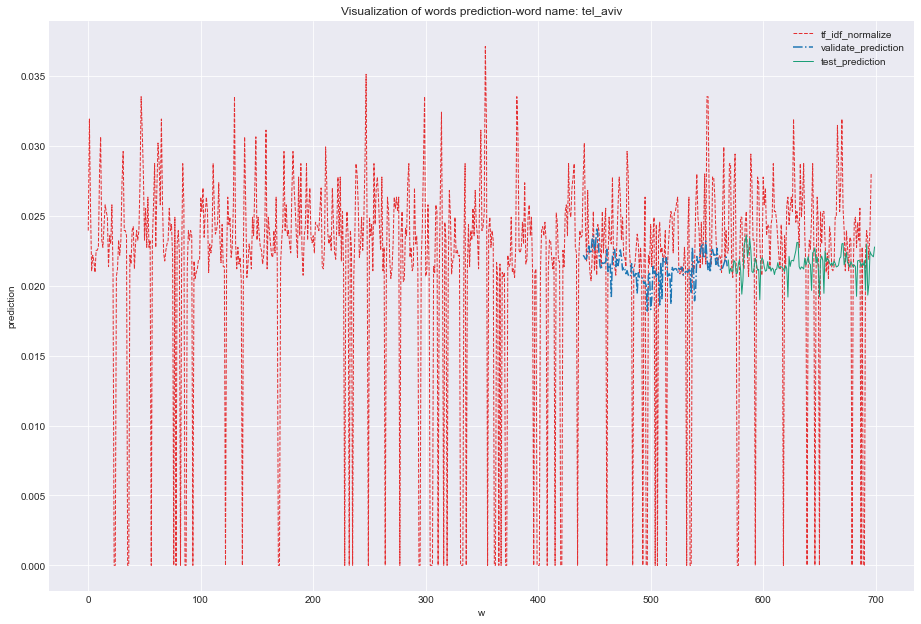

In [71]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

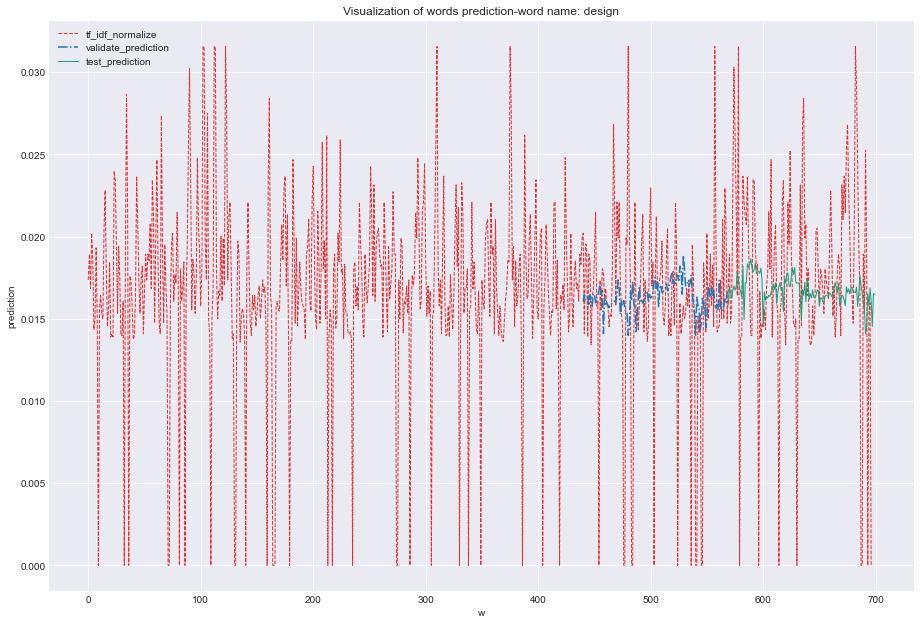

In [72]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

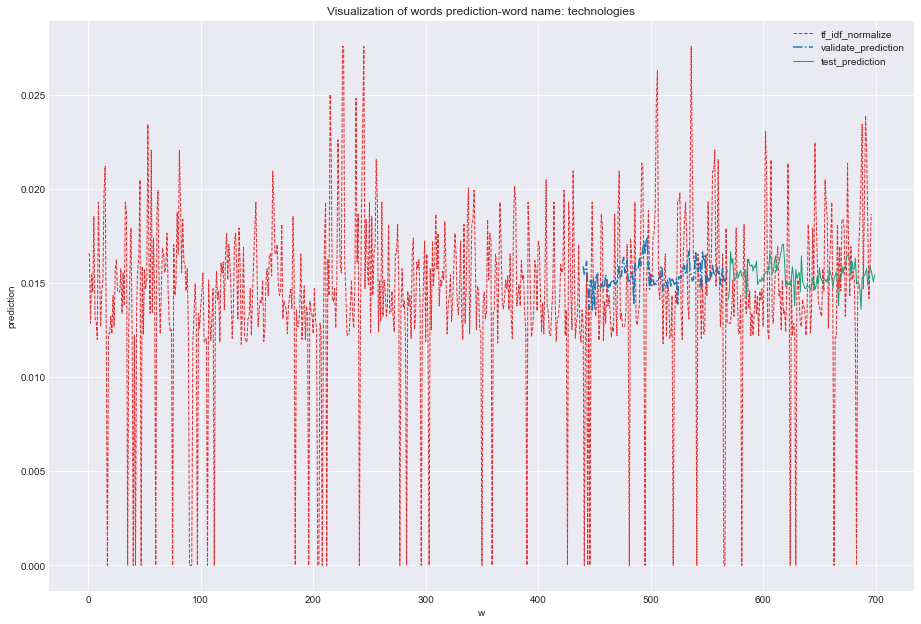

In [73]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

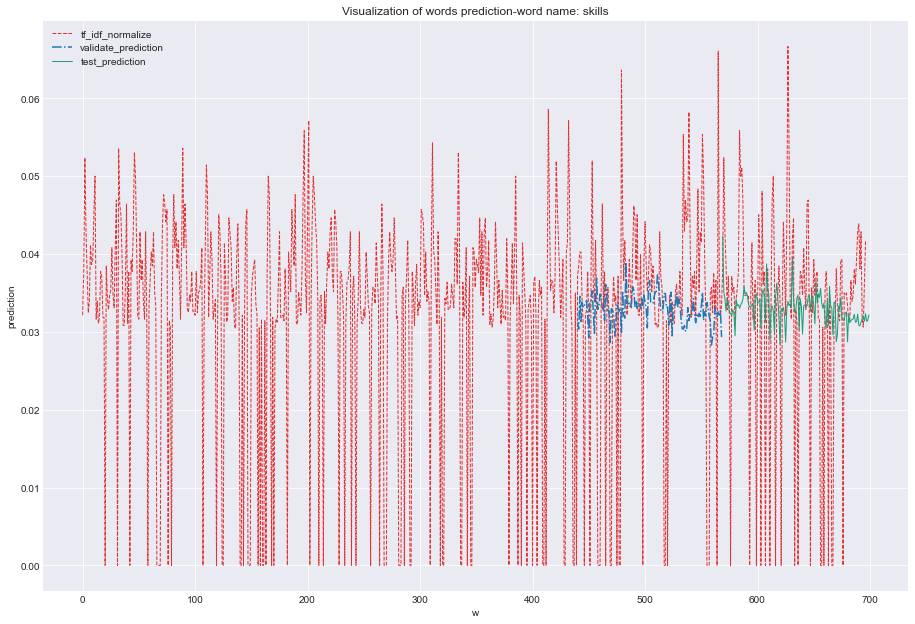

In [74]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

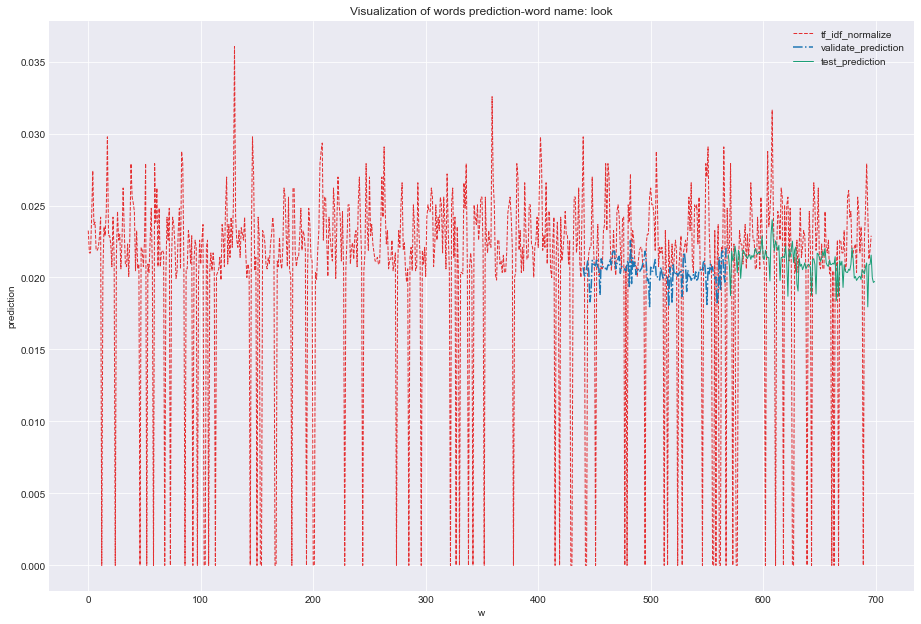

In [75]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)